In [1]:
#euler test
import numpy as np

r = np.asarray([1,0,0])
center = np.asarray([0,0,0])
r_centered = r-center
print(r_centered)

a = 90
b = 0
y = -90

from scipy.spatial.transform import Rotation

A = Rotation.from_euler('XYZ',[y, b, a], degrees=True)

rotation_matrix = A.as_matrix()
print(rotation_matrix)


#[190.64 149.49 202.24] -> [280.64        99.50677852 342.22322148]


r_centered_rotated = rotation_matrix@r_centered
r_centered_rotated_shifted = r_centered_rotated+center

print(r_centered_rotated_shifted)

[1 0 0]
[[ 2.22044605e-16 -1.00000000e+00  0.00000000e+00]
 [ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [-1.00000000e+00 -2.22044605e-16  2.22044605e-16]]
[ 2.22044605e-16  2.22044605e-16 -1.00000000e+00]


In [2]:
# --- REALITY WAS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_shell_init = b0.b0()
filename_to_import_csv_data_from = r'./data/240905/shell_no_inserts_240905_50pts_bvals.csv'
b0map_shell_init.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])
# volume from shell init
b0map_shell_init.transfer_coordinates_of_the_path_from_cosi_to_magnet(filtering = 1.5,stepsize=10,onesign=True)


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240905/shell_no_inserts_240905_50pts_bvals.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240905/shell_no_inserts_240905_50pts
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [8.54925020e-15 1.16415322e-14 5.36601874e-15]
ROTATING THE MAGNET NOW!
len(path.r)= 2500
len(b0Data)= 2500
-119.70999999999998  < x <  119.71000000000001
-119.85999999999999  < y <  119.86000000000001
-119.93999999999997  < z <  119.94
[0.13999999999998636, 0.21999999999997044, 0.30000000000001137

c:\cosi-measure\Software\COSI2\b0.py:316: RuntimeWarning: divide by zero encountered in scalar divide
  if meanField_raw/abs(self.fieldDataAlongPath[idx,0])>filtering:


In [3]:

# spherical decomposition
diameter_of_sphere = b0map_shell_init.path.radius*2
order = 13
resolution_of_sph_decomp = 9
print(diameter_of_sphere)

b0map_shell_init.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=10
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_shell_init.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


240.01220385638732
(24, 24, 24)
Mean field strength in 24 cm sphere: -47.35 mT
Inhomogeneity in 24 cm sphere: -9398 ppm
Inhomogeneity of fit: 9534 ppm
Error: -3315 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 13, resol 10 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 9070 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


mean, mT:  -47.349710947930575
low, mT: -47.642 
high, mT: -47.197


<Figure size 640x480 with 0 Axes>

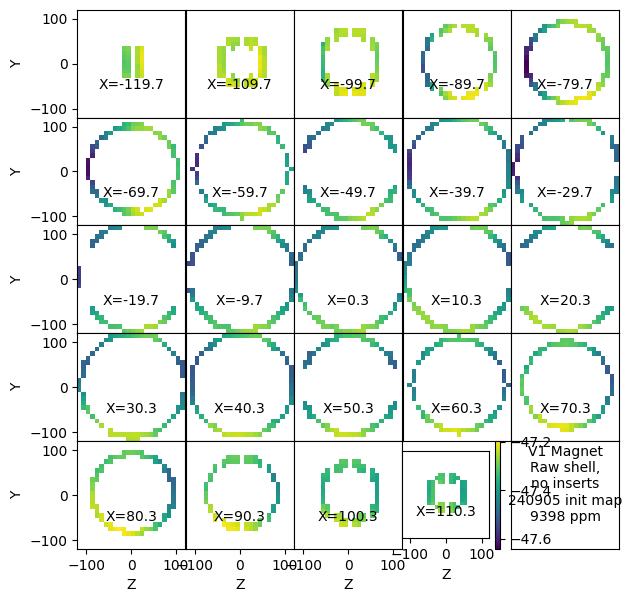

In [4]:
# Shell field (raw, initial)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(7, 7))

FieldMeasured = b0map_shell_init.b0Data[:,:,:,0] # - b0map_noinsert.interpolatedField

print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))
homoshellinit = (np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured)*1e6
      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'V1 Magnet\nRaw shell,\nno inserts\n240905 init map\n%.0f ppm'%abs(homoshellinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_shell_init.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
       
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')

plt.subplots_adjust(wspace=-0.0, hspace=0)




In [5]:
#calculate preliminary homogeneity
rawdata = b0map_shell_init.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshellinit = (maxval-minval)/meanval*1e6

print('homo on shell:%.0f'%homoshellinit)



-47.197
-47.642
-47.197
-47.642
-47.3426536
homo on shell:-9400


In [6]:
print(np.nanmin(b0map_shell_init.fieldDataAlongPath[:,0]))
print(np.nanmax(b0map_shell_init.fieldDataAlongPath[:,0]))
print(np.nanmin(b0map_shell_init.b0Data[:,:,:,0]))
print(np.nanmax(b0map_shell_init.b0Data[:,:,:,0]))



-47.642
0.0
-47.642
-47.197


mean, mT:  -47.354692930184896
low, mT: -47.628812119727264 
high, mT: -47.19931514062172


<Figure size 640x480 with 0 Axes>

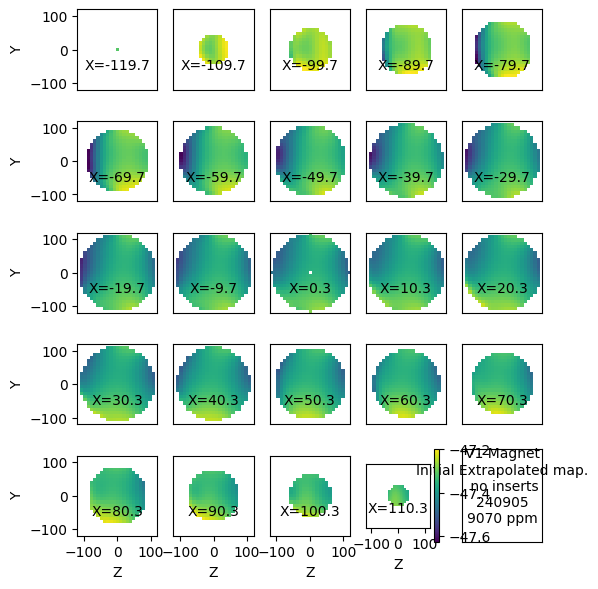

In [7]:

# initial field (RAW)
# save initial field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_shell_init.xPts
FieldMeasured = b0map_shell_init.interpolatedField


fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(6, 7))

print('mean, mT: ',np.nanmean(FieldMeasured))
print('low, mT:',np.nanmin(FieldMeasured),'\nhigh, mT:',np.nanmax(FieldMeasured))

homoinit = (np.nanmax(FieldMeasured)-np.nanmin(FieldMeasured))/np.nanmean(FieldMeasured)*1e6

      
for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'V1 Magnet\nInitial Extrapolated map.\n no inserts\n240905\n%.0f ppm'%abs(homoinit), horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(FieldMeasured[i*5+j,:,:],clim=[np.nanmin(FieldMeasured),np.nanmax(FieldMeasured)],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%b0map_shell_init.xPts[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')




In [8]:
print(b0map_shell_init.xDim_SPH_fine)

[-120.00610193 -110.00559343 -100.00508494  -90.00457645  -80.00406795
  -70.00355946  -60.00305096  -50.00254247  -40.00203398  -30.00152548
  -20.00101699  -10.00050849    0.           10.00050849   20.00101699
   30.00152548   40.00203398   50.00254247   60.00305096   70.00355946
   80.00406795   90.00457645  100.00508494  110.00559343  120.00610193]


In [9]:

#??? lets generate fields of all inserts, all rings.
#??? Insert X ring 0, minimal Z, Y~0, all rotations pointing to -Z direction (alpha=-pi/2) 0 reference

In [10]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets

bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 276*1e-3#276*1e-3#!!!TMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

trays_occupied = [1]#[-7,-5,1,14] #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [11]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
insert_nr = 9 # IRL 3!!!
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 3, y~0, min(|z|)
            #if (segmentAngle > 360/12*(insert_nr-0.5)) and (segmentAngle < 360/12*(insert_nr+0.5)):
                # choose only Ring 0:
                #if ringPosition == ringPositions[0]:
                    #position[0] = -0.07 #!!!!! TEMP!!!!!
                    #position[2] -=0.03 #!!!!! TEMP!!!!!
                    #print(360/12*(insert_nr-0.5),360/12*(insert_nr+0.5))
            positions.append(position)
                
print(len(positions))

for pos in positions:
    print(pos[0],pos[1],pos[2])


let us position some magnets on a circumference of a R=276 mm YZ circle with X=0
84
0.0045 0.27211479674710887 -0.04614691096140277
0.0045 0.2742709847847707 -0.030845208788272026
0.0045 0.27556740718070843 -0.015446815196073495
0.0045 0.276 0.0
0.0045 0.27556740718070843 0.0154468151960735
0.0045 0.2742709847847707 0.030845208788272037
0.0045 0.27211479674710887 0.04614691096140277
0.0045 0.2587317822093368 0.09609300117480107
0.0045 0.2529482447387227 0.11042275799670676
0.0045 0.2463717826715406 0.12440636922299107
0.0045 0.2390230114445051 0.13799999999999998
0.0045 0.2309249674754671 0.15116103795771738
0.0045 0.22210303595045067 0.16384822678806393
0.0045 0.21258487124793404 0.17602179557230782
0.0045 0.17602179557230782 0.21258487124793404
0.0045 0.16384822678806393 0.22210303595045067
0.0045 0.15116103795771738 0.2309249674754671
0.0045 0.13800000000000004 0.23902301144450508
0.0045 0.12440636922299107 0.2463717826715406
0.0045 0.11042275799670671 0.2529482447387227
0.0045 0.09

magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.27211479674710887 -0.04614691096140277
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.2742709847847707 -0.030845208788272026
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.27556740718070843 -0.015446815196073495
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.276 0.0
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045 0.27556740718070843 0.0154468151960735
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
computing field of one shim magnet at  0.0045

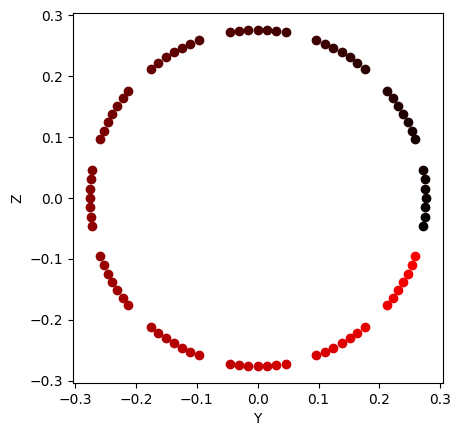

In [12]:

import matplotlib.pyplot as plt
axs = plt.axes()
for idx,position in enumerate(positions):

    axs.scatter(position[1],position[2],color = [idx/len(positions),0,0])

axs.set_aspect(1)
plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map_shell_init.interpolatedField
numMags = len(positions)

# making coordinate grid
xPts = b0map_shell_init.xDim_SPH_fine# np.linspace(min(xvals),max(xvals),int((max(xvals)-min(xvals))/resol))
yPts = b0map_shell_init.yDim_SPH_fine# np.linspace(min(yvals),max(yvals),int((max(yvals)-min(yvals))/resol))
zPts = b0map_shell_init.zDim_SPH_fine# np.linspace(min(zvals),max(zvals),int((max(zvals)-min(zvals))/resol))


xgrid,ygrid,zgrid = np.meshgrid(xPts,yPts,zPts,indexing='ij')

coordinate_grid = [xgrid,ygrid,zgrid]

magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)

from utils import shimming_magnet

shimming_magnets = []

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.bRem = bRem # 1.35 T
    magnet.render_field(grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,grid = coordinate_grid)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    shimming_magnets.append(magnet)

magnetFields *= 1e3


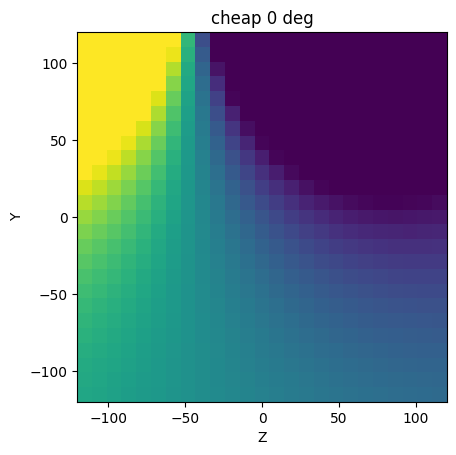

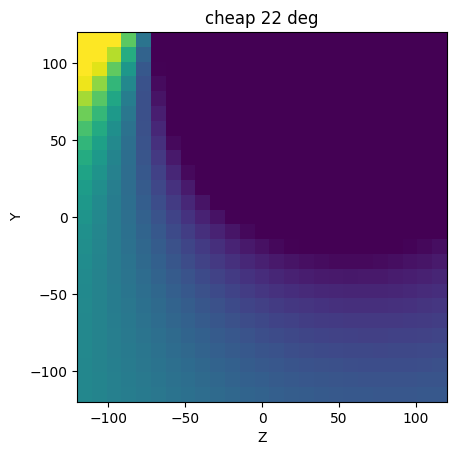

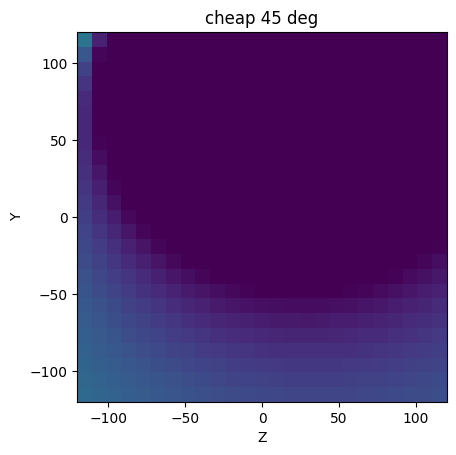

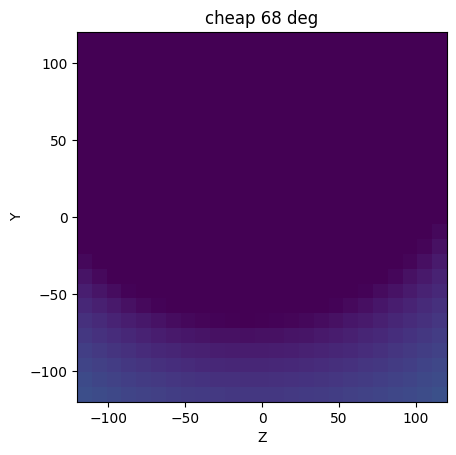

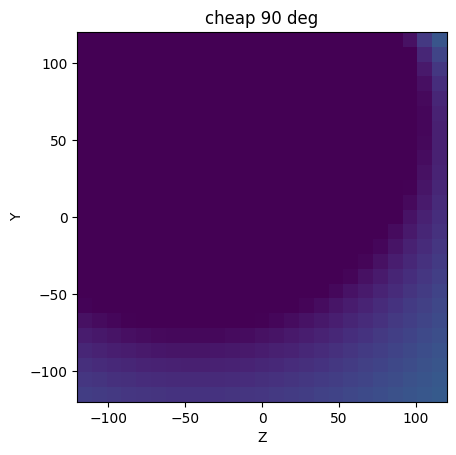

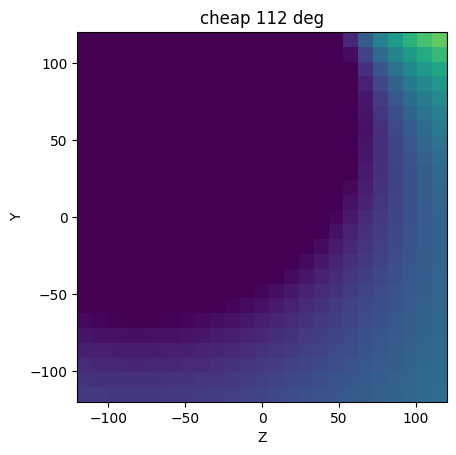

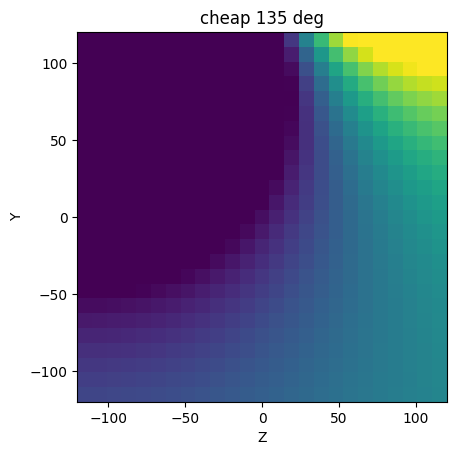

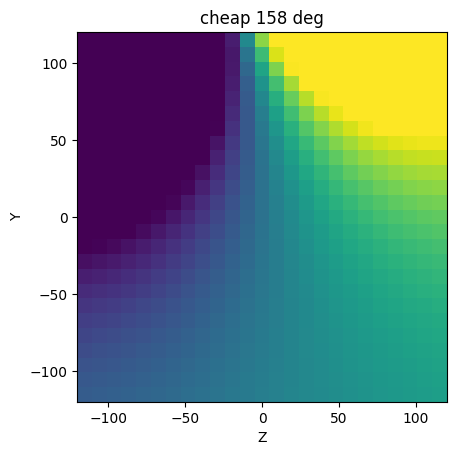

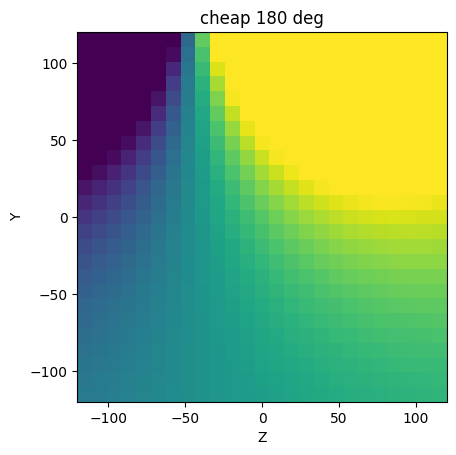

In [13]:
# cheap vs real fields
# DO NOT RUN
plt.cla()

magnet_index = 0
yzsliceidx = 19

for i in range(9):
    alpha = i*np.pi/8
    
    cheapfield = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
     
    plt.imshow(cheapfield,vmin=-1e-3, vmax=1e-3,extent=[min(zPts),max(zPts),min(yPts),max(yPts)],origin='lower')
    plt.title('cheap %.0f deg'%(alpha*180/np.pi))
    plt.xlabel('Z')
    plt.ylabel('Y')
    
    plt.show()



[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+00 1.64082649e-08 1.64082649e-08]
[0.00000000e+

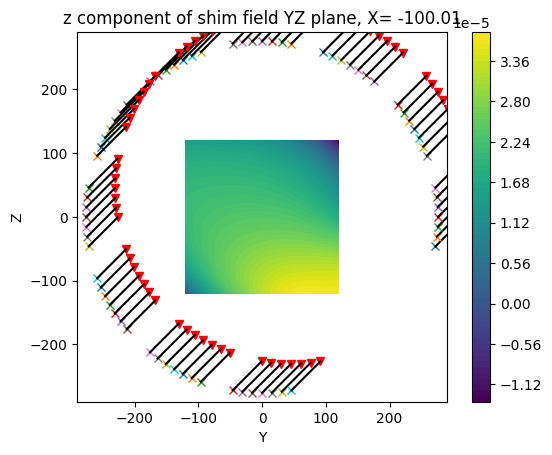

In [14]:
# visualize the field of one insert
resolution = 1/resolution_of_sph_fit*1e3

X = b0map_shell_init.xDim_SPH_fine*1e0
Y = b0map_shell_init.yDim_SPH_fine*1e0
Z = b0map_shell_init.zDim_SPH_fine*1e0

ONEINSERTFIELD = magnetFields[:,:,:,:,0]*0

ax = plt.figure().add_subplot()

for idx in range(70):#range(len(positions)):

    position = positions[idx]
    y2d, z2d = np.meshgrid(Y,Z,indexing='ij') #!!!!!!!!!!!

    alpha = np.pi/4
    shimming_magnets[idx].rotation_yz = alpha

    shimming_magnets[idx].render_field(grid=coordinate_grid)
    print(shimming_magnets[idx])
    ONEINSERTFIELD += shimming_magnets[idx].B0_expensive  #magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    ax.plot(position[1]*1000,position[2]*1000,'x')
    dispveclen = 64 # len of arrow
    direction = [dispveclen*np.cos(alpha),dispveclen*np.sin(alpha)]
    ax.plot(position[1]*1000+direction[0],position[2]*1000+direction[1],'rv')
    
    ax.plot([position[1]*1000,position[1]*1000+direction[0]],[position[2]*1000,position[2]*1000+direction[1]],'k-')

    
scale = 5e-0
yzsliceindex = 2
mpbl = ax.contourf(y2d,z2d,(ONEINSERTFIELD[yzsliceindex,:,:,2]),cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)

plt.colorbar(mappable=mpbl)
#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.png',format="png")
plt.savefig('./pics/field_of_ALL_INSERTS_ITER2_INITIAL.pdf',format="pdf")

plt.show()

In [15]:
# RENDERING FIELDS OF SHIM MAGNETS

MagnetsField_simulated = shimming_magnets[0].B0[:,:,:,2]*0
    

for magnet_index, pos in enumerate(positions[0:1]):
    alpha = 0#np.pi/2#-np.pi/2#np.pi/2#np.pi/2#!TEMP-np.pi/2
    cheapfield_onemagnet = magnetFields[yzsliceidx,:,:,2,magnet_index]*np.cos(alpha)-magnetFields[yzsliceidx,:,:,1,magnet_index]*np.sin(alpha)   
    MagnetsField_simulated += cheapfield_onemagnet
    
    
    
#mask the one magnet field:
MagnetsField_simulated*= b0map_shell_init.sphere_mask
#MagnetsField_simulated*=1e3 

homo_oneMagnet = (np.nanmax(MagnetsField_simulated)-np.nanmin(MagnetsField_simulated))/np.nanmean(MagnetsField_simulated)*1e6
print('homo of one magnet ppm %.0f'%(abs(homo_oneMagnet)))
print('mean mT %.2f'%(abs(np.nanmin(MagnetsField_simulated))))


homo of one magnet ppm 9447251
mean mT 0.00


<Figure size 640x480 with 0 Axes>

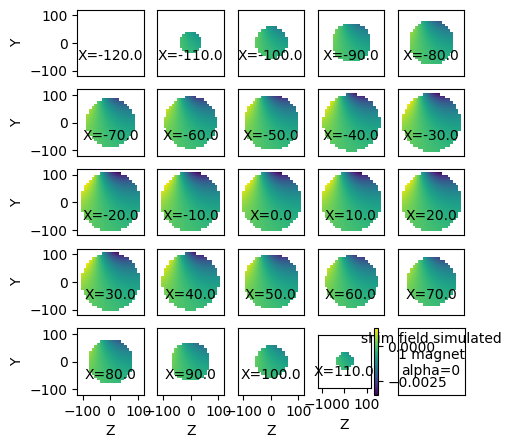

In [16]:
# what we expect with insert at min_z 0y ring 0:
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

xvals = b0map_shell_init.xDim_SPH_fine

for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'shim field simulated\n1 magnet\nalpha=0' , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(MagnetsField_simulated[i*5+j,:,:],clim=[np.nanmin(MagnetsField_simulated),np.nanmax(MagnetsField_simulated)],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')


plt.savefig('./pics/iter2_init_field_interp.png',format="png")
plt.savefig('./pics/iter2_init_field_interp.pdf',format="pdf")
plt.show()









(25, 25, 25, 3, 84)


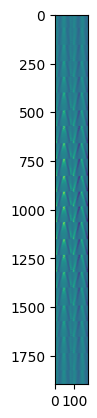

In [17]:
# now least squares for magnet rotation.
# generating the magnetic fields:
# magnet field is magnetFields[:,:,:,2,0]
# mask the magnet fields
b0map = b0map_shell_init

DSV = b0map.path.radius*2 # 
DSV_INNER = b0map.path.radius*1.8 #!!!TEMP*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields = magnetFields[sphereMask == 1, :,:].astype(float) #!!! TEMP!!!!
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #


In [18]:

# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([-np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))

(1896, 168)
(168,)
(1896,)


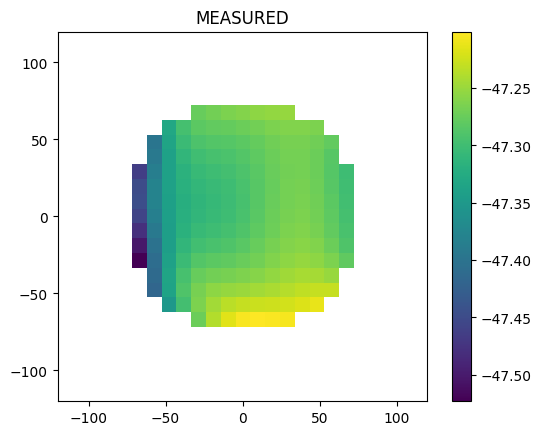

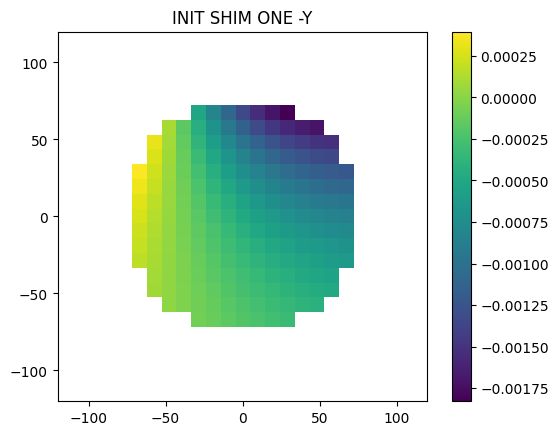

(1896,)
(25, 25, 25)


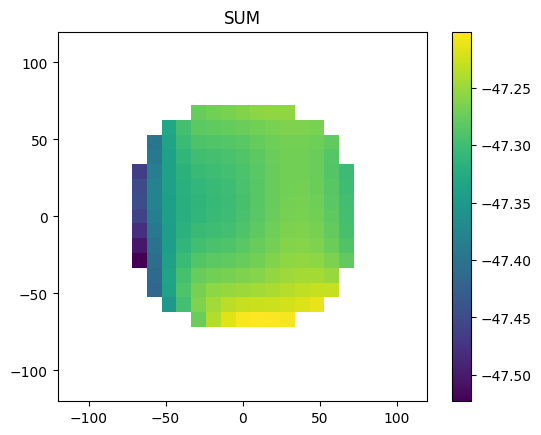

In [19]:
plt.imshow(FieldMeasured[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('MEASURED')
plt.colorbar()
plt.show()
plt.imshow(MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.title('INIT SHIM ONE -Y')
plt.colorbar()
plt.show()
plt.imshow(FieldMeasured[3,:,:]+1*MagnetsField_simulated[3,:,:],origin = 'lower',extent=[-120,120,-120,120])
plt.colorbar()
plt.title('SUM')


initialFieldMasked = FieldMeasured[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(FieldMeasured))

In [20]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):

            stackedRotationVector = np.hstack([-np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked,stackedRotationVector)+initialFieldMasked

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9

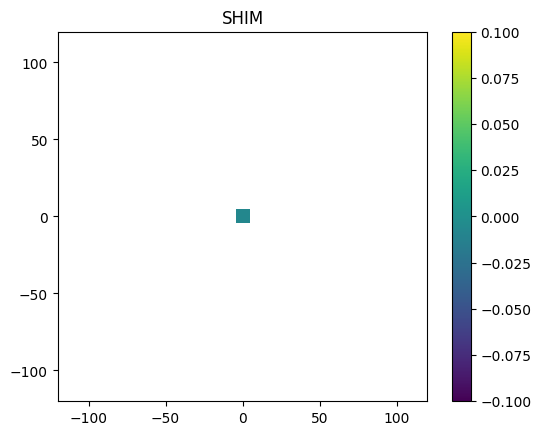

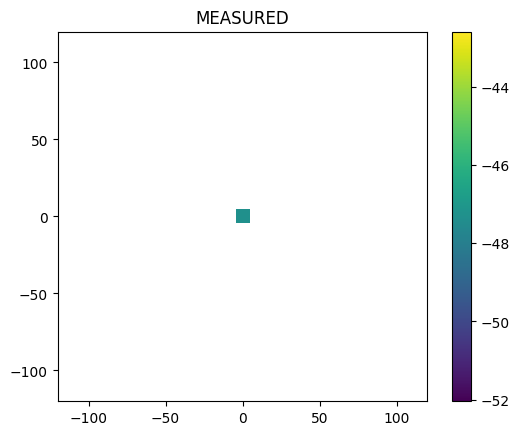

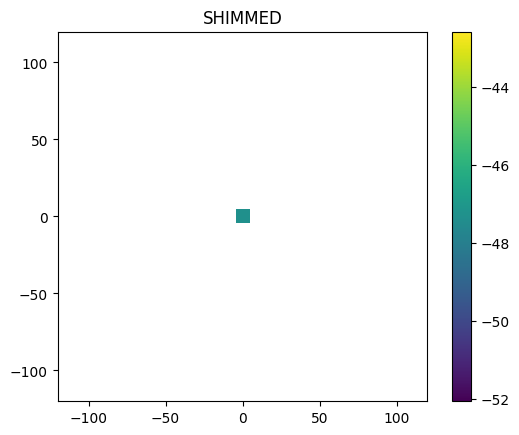

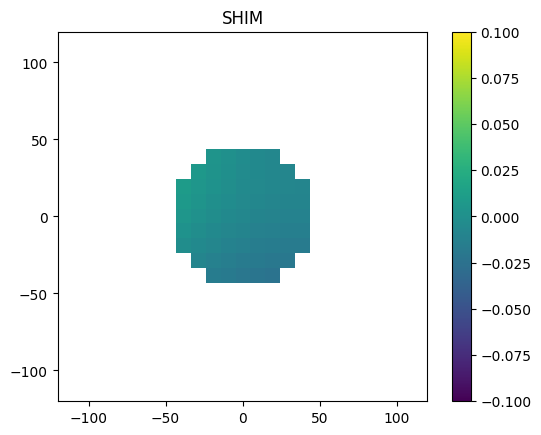

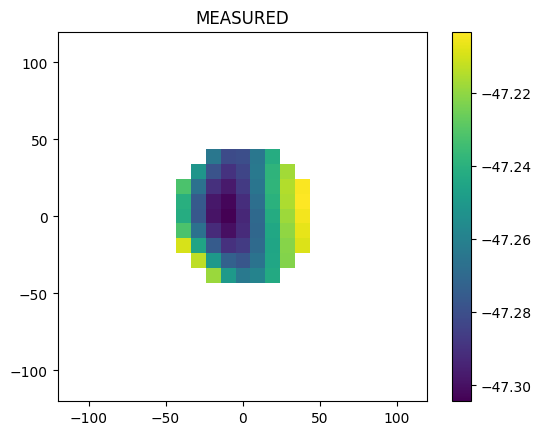

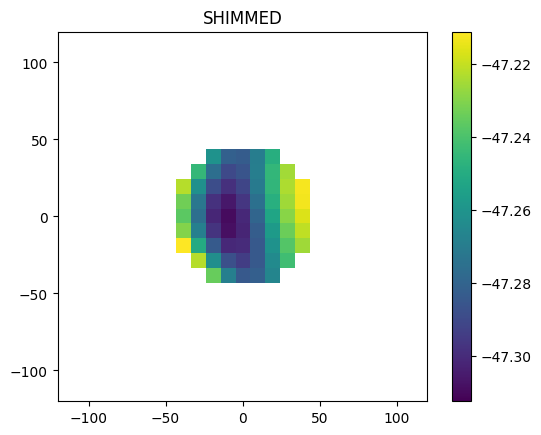

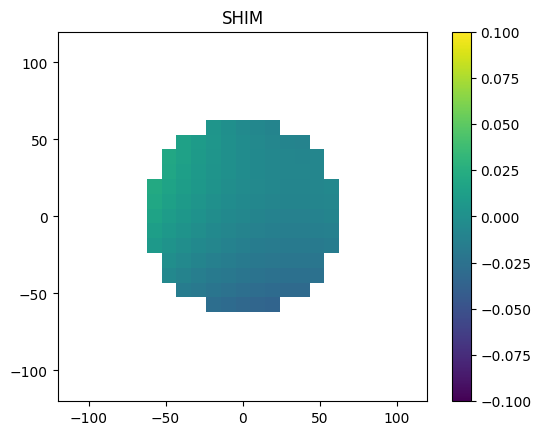

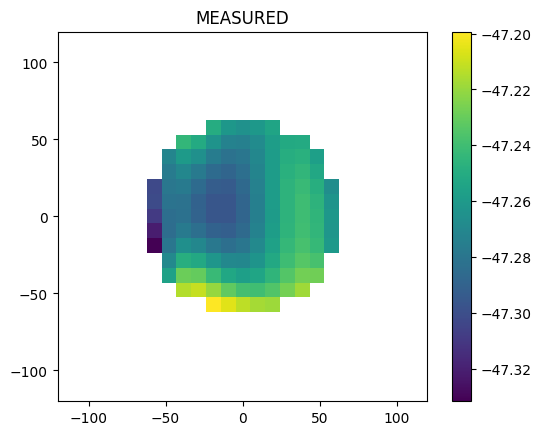

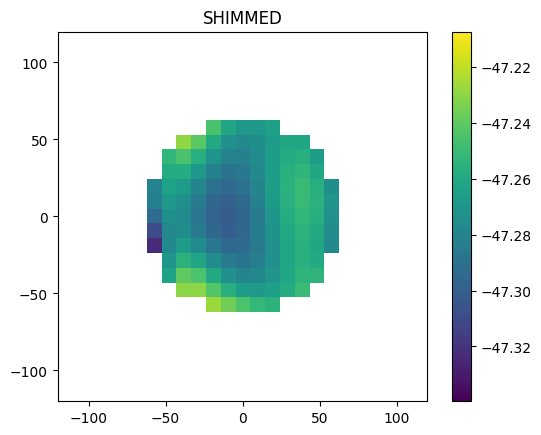

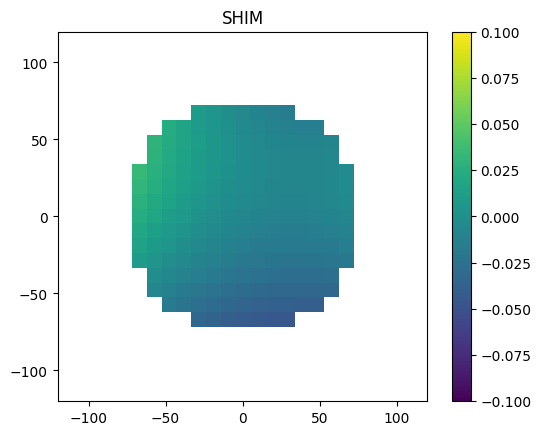

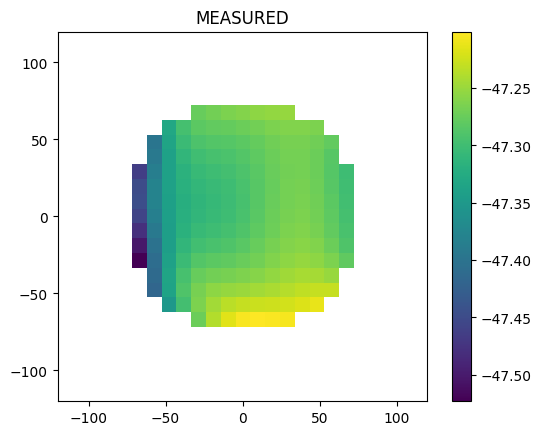

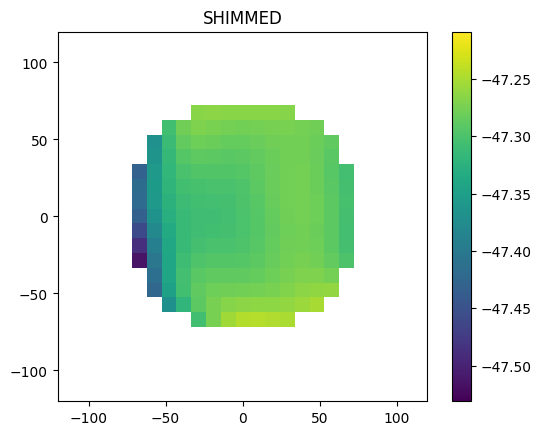

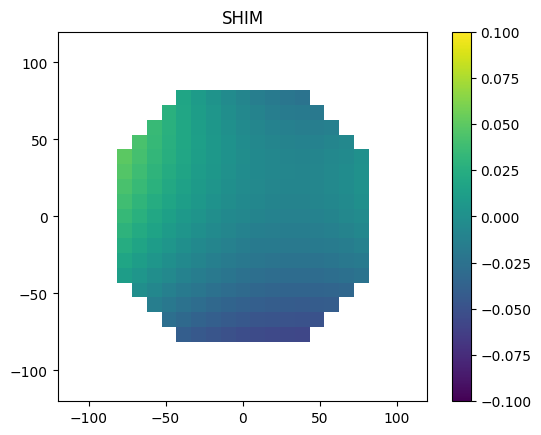

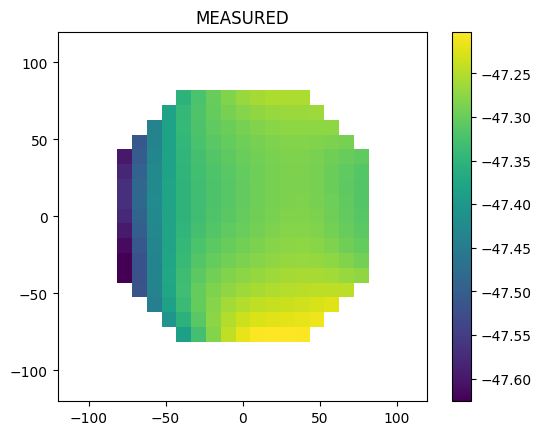

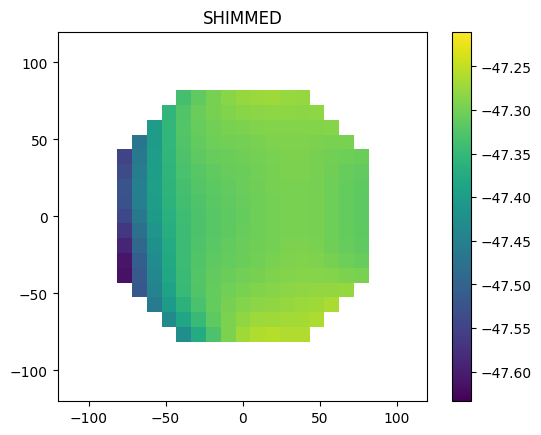

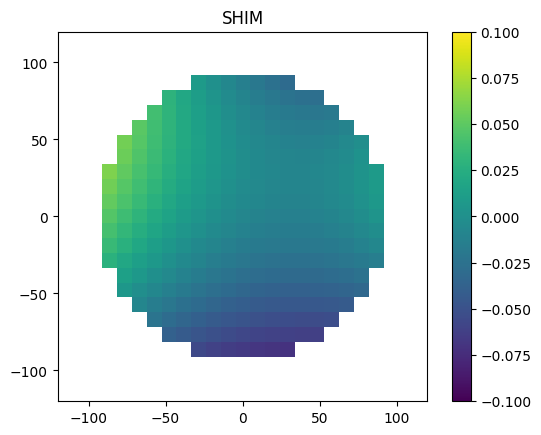

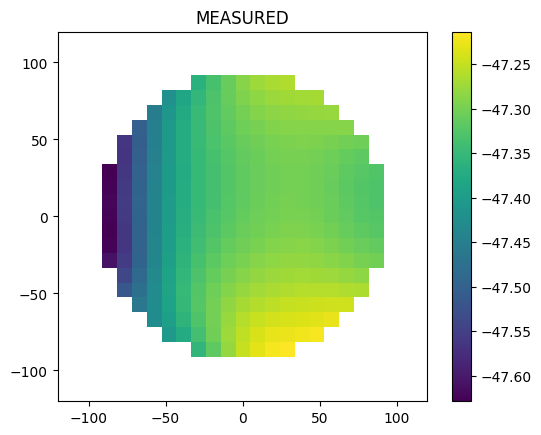

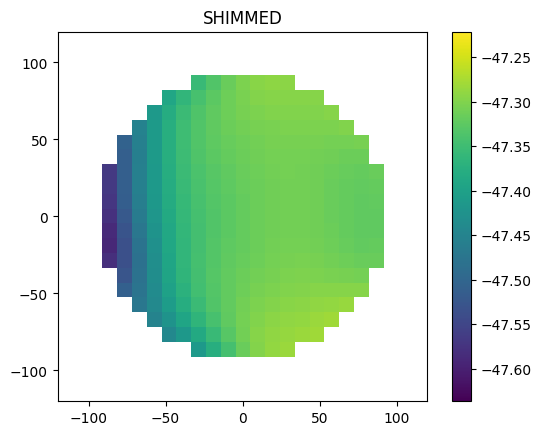

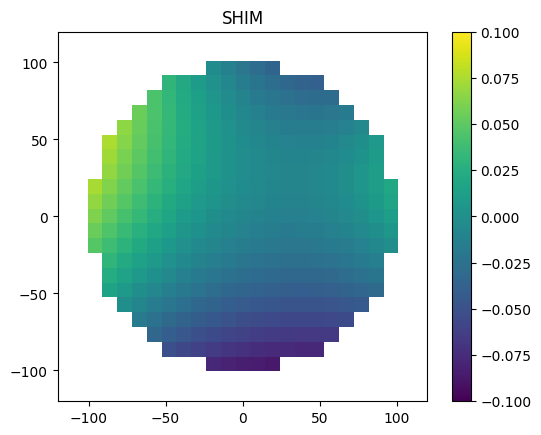

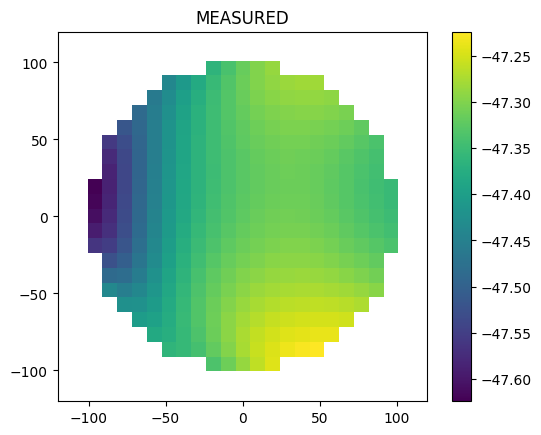

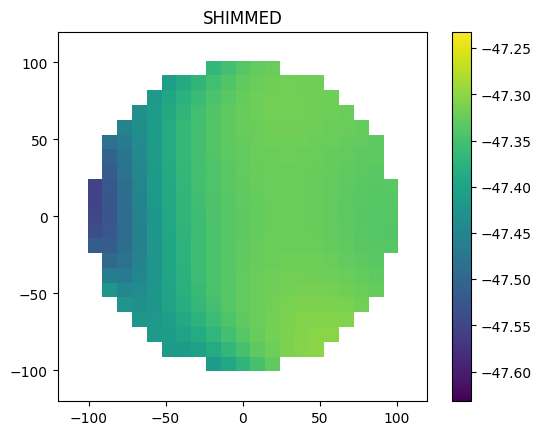

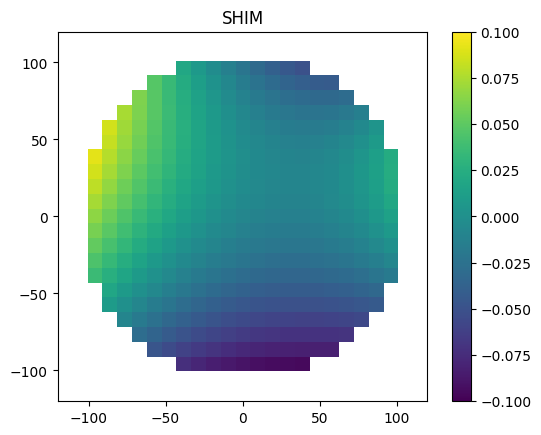

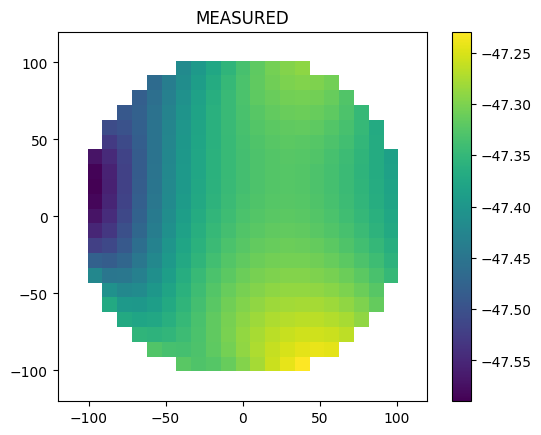

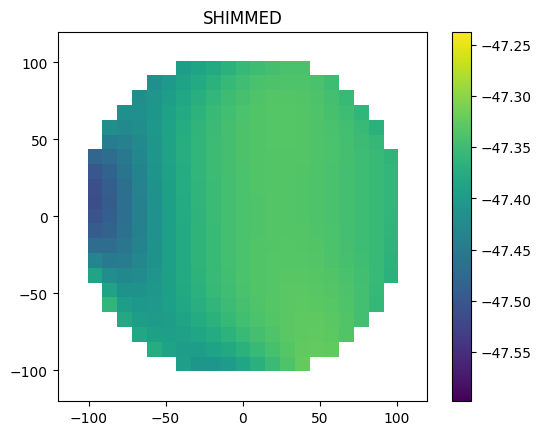

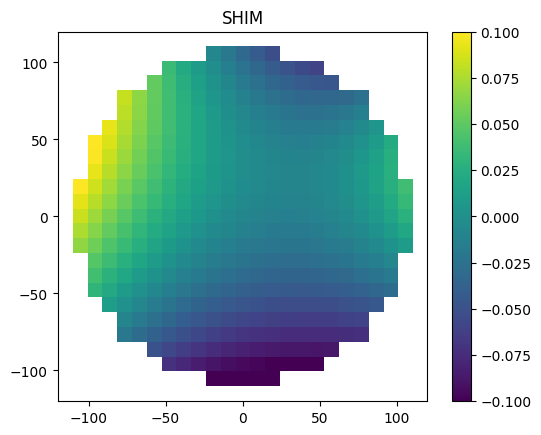

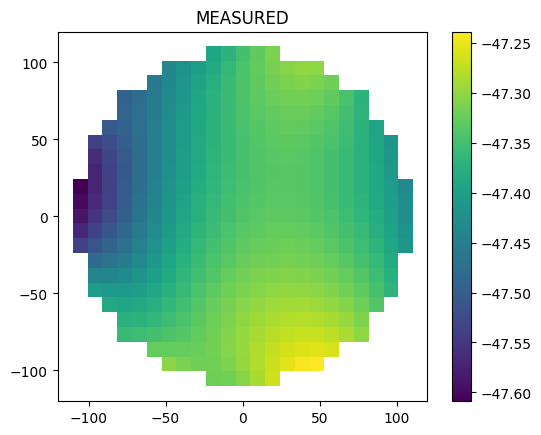

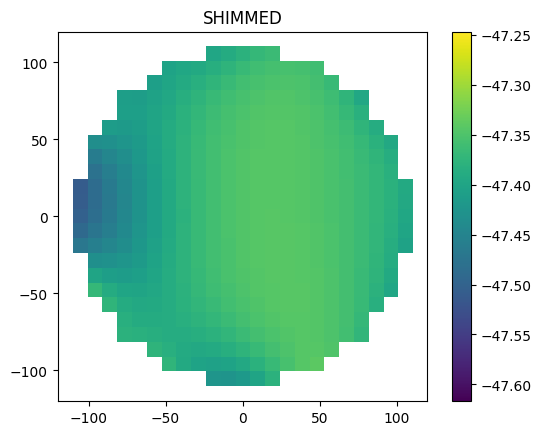

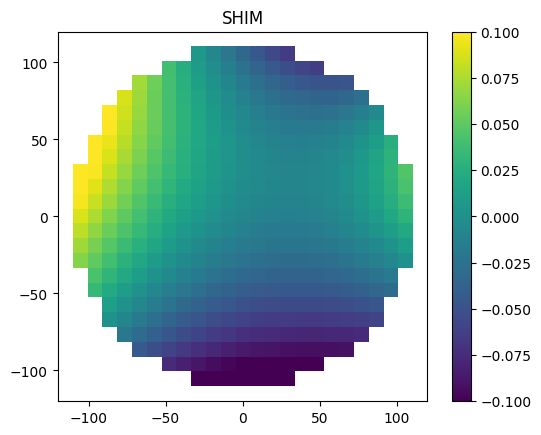

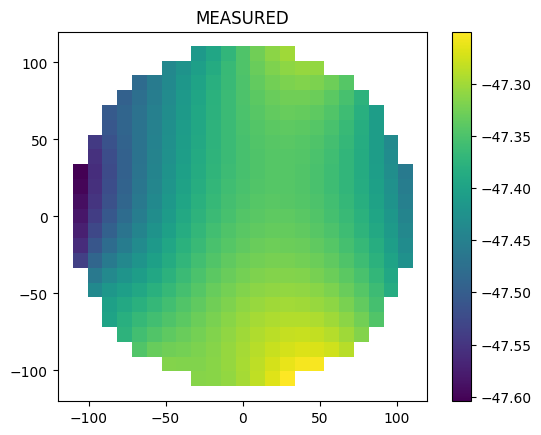

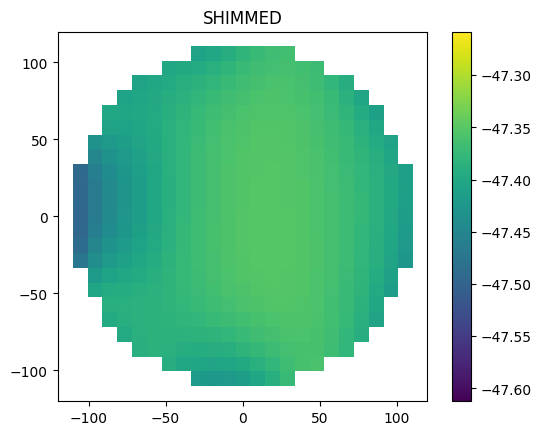

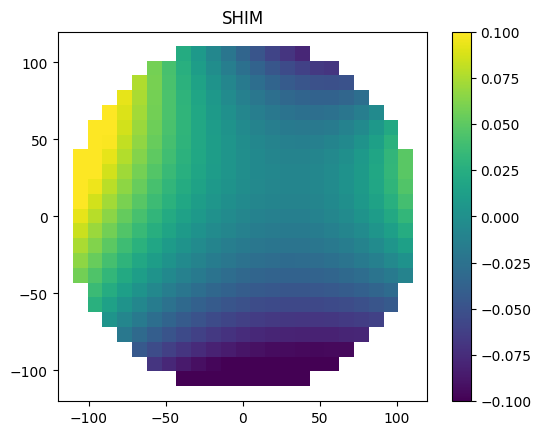

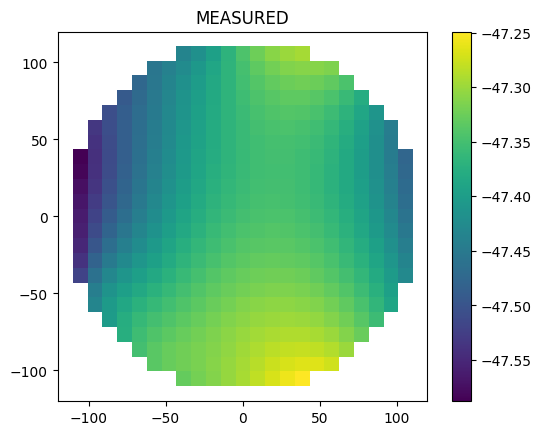

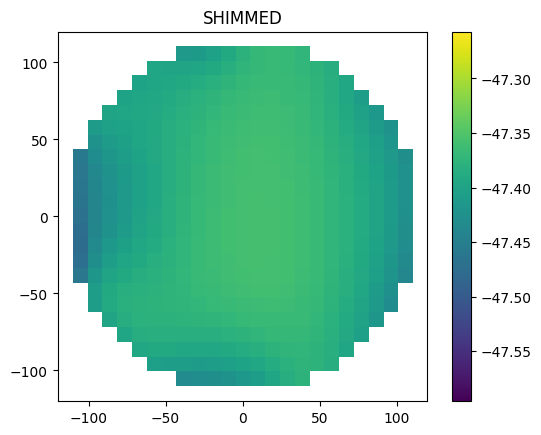

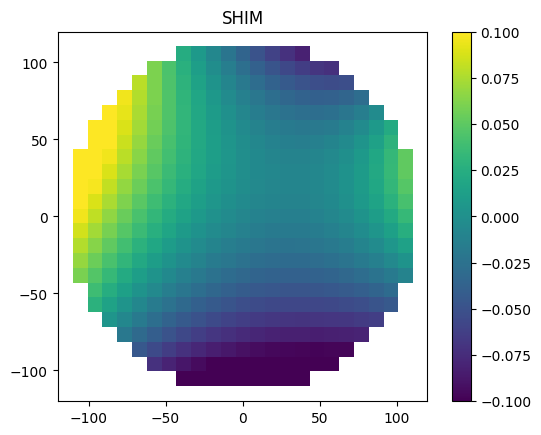

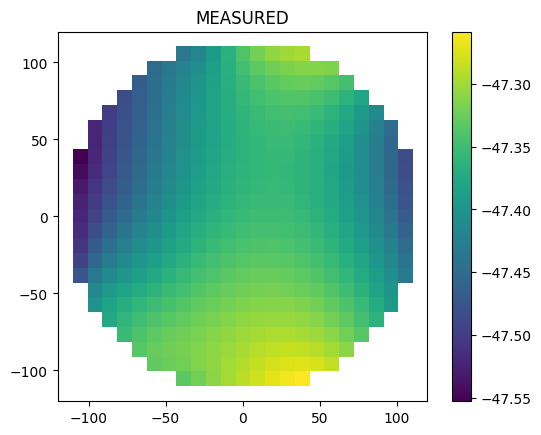

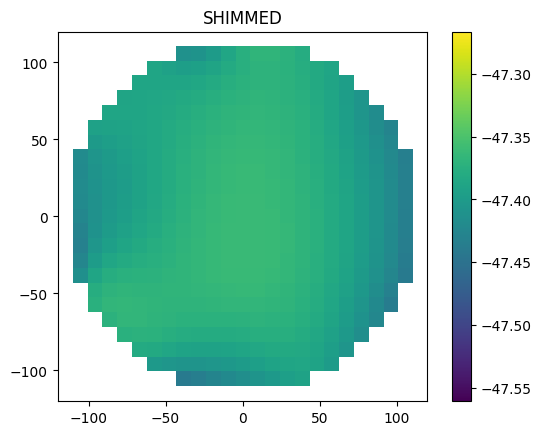

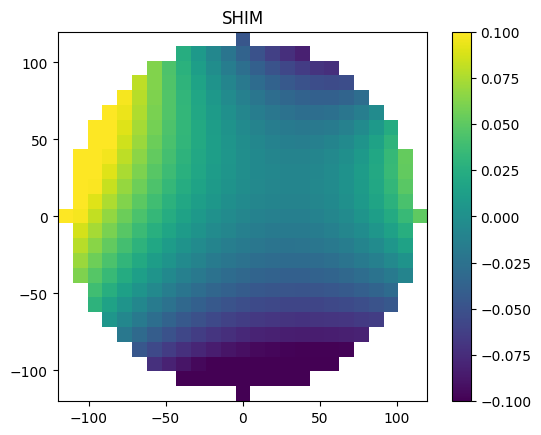

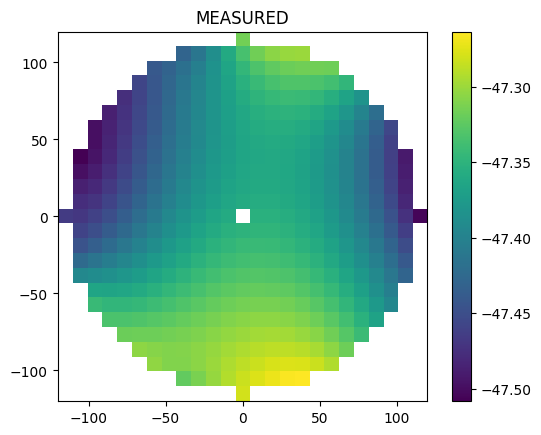

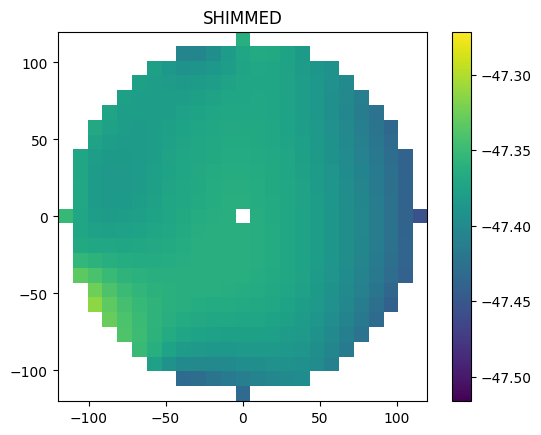

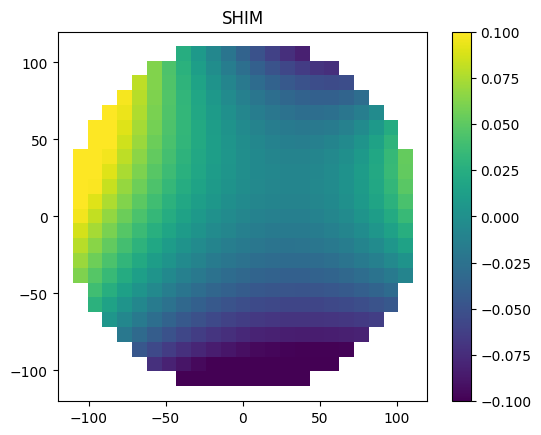

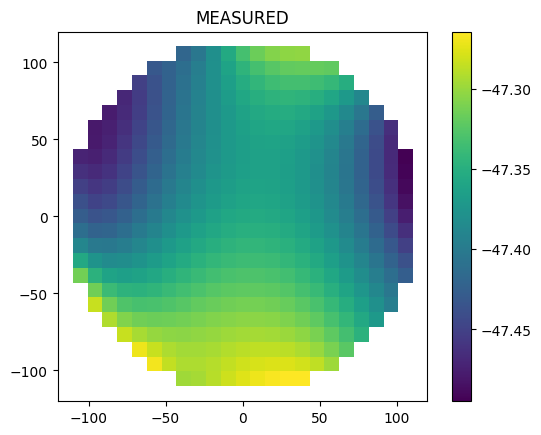

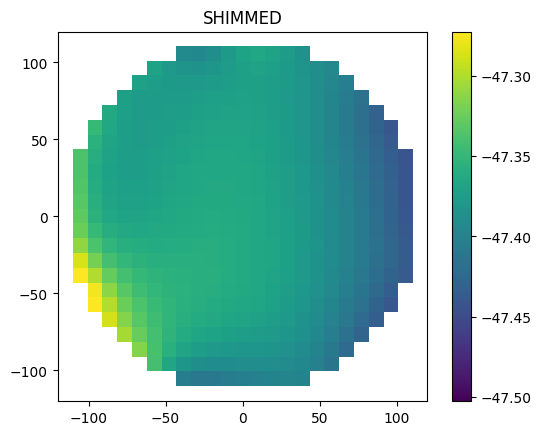

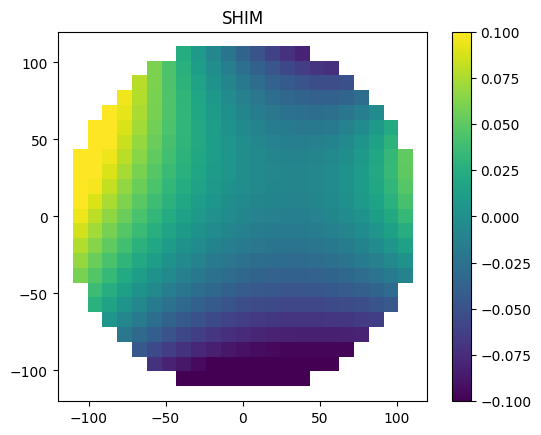

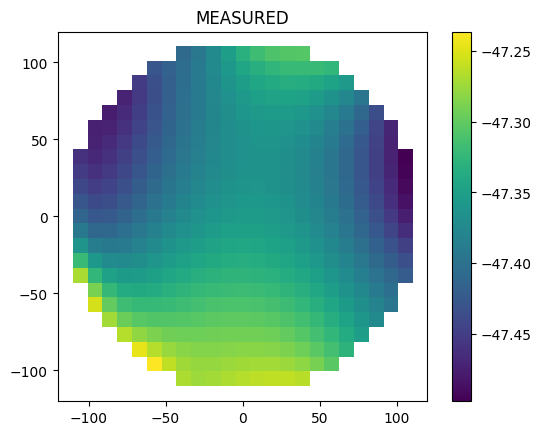

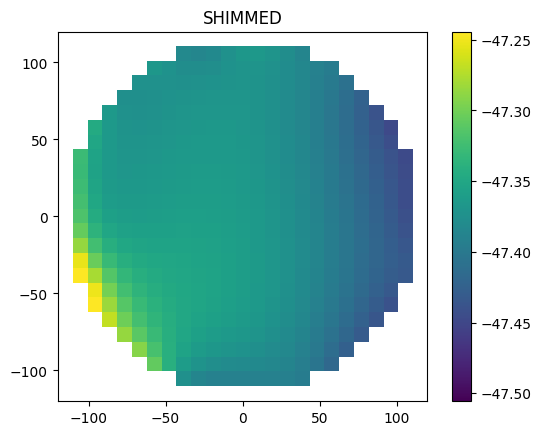

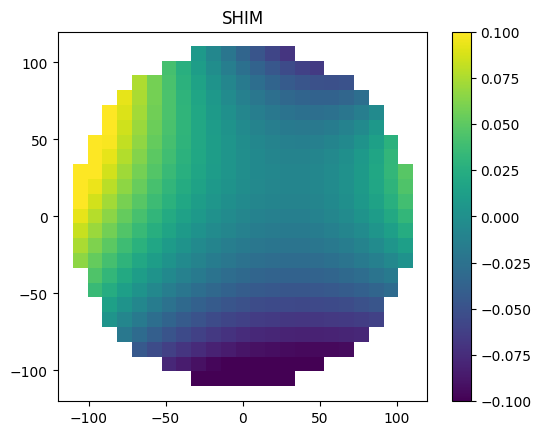

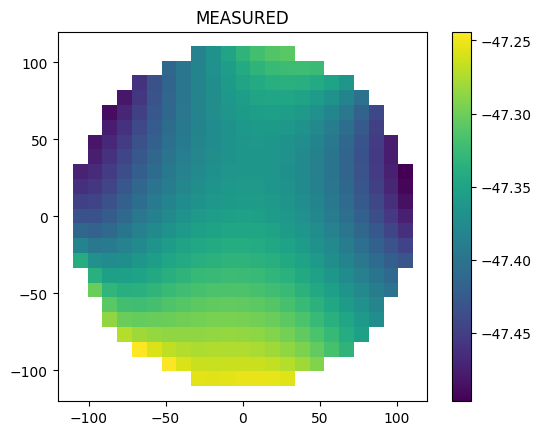

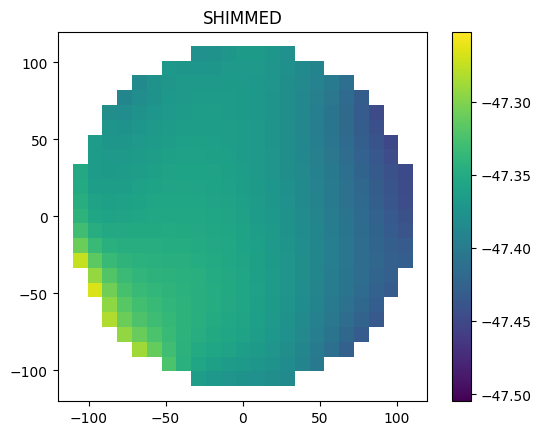

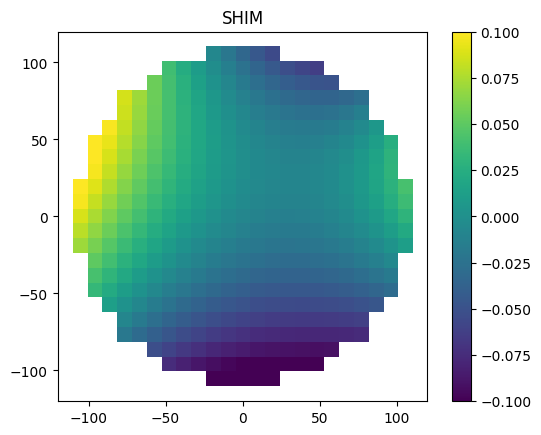

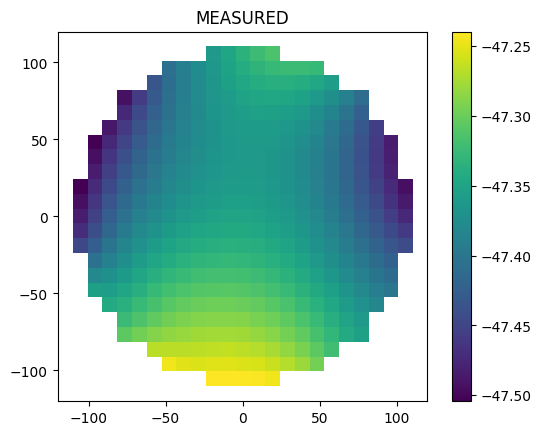

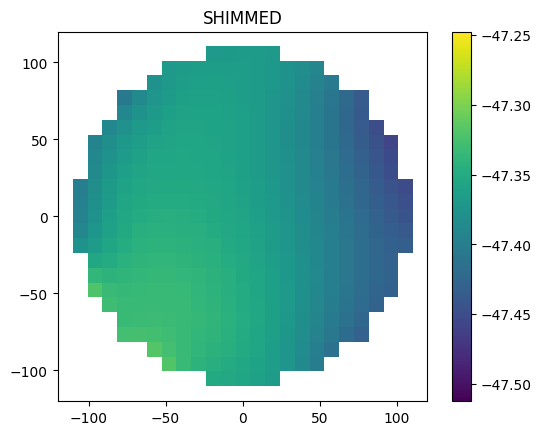

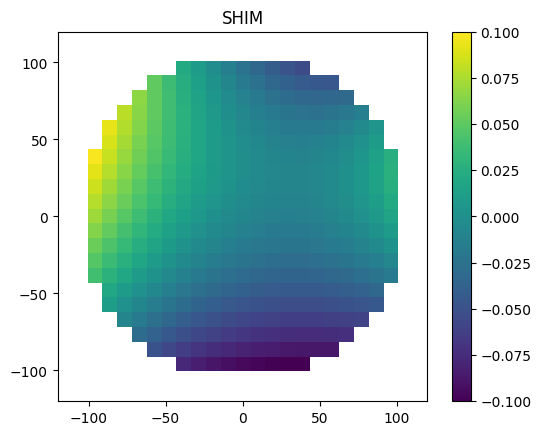

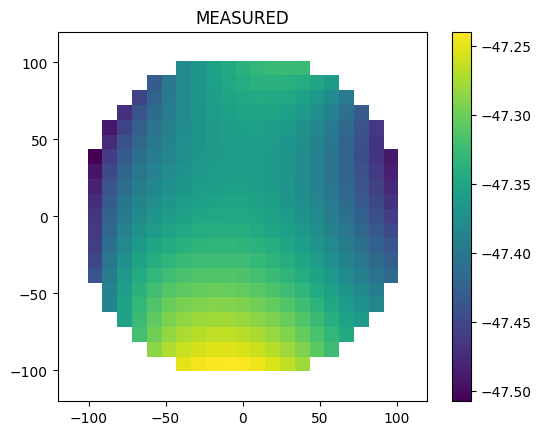

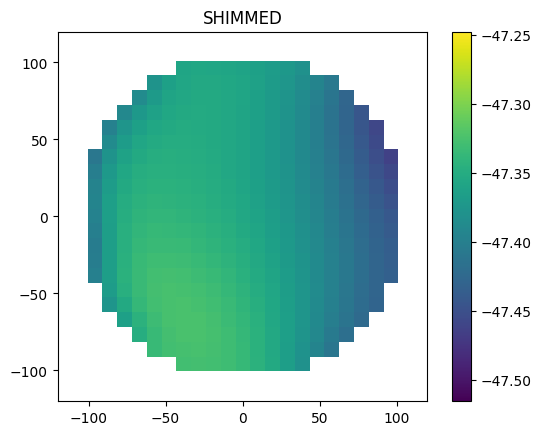

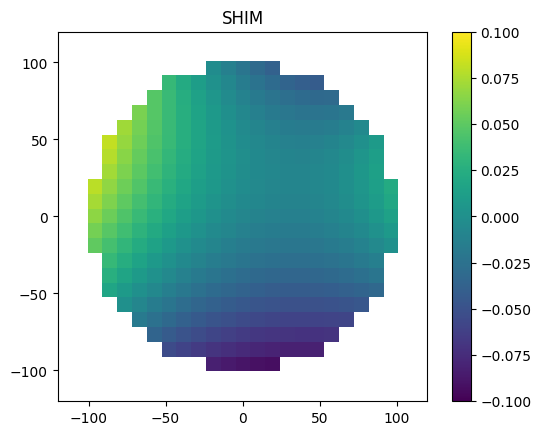

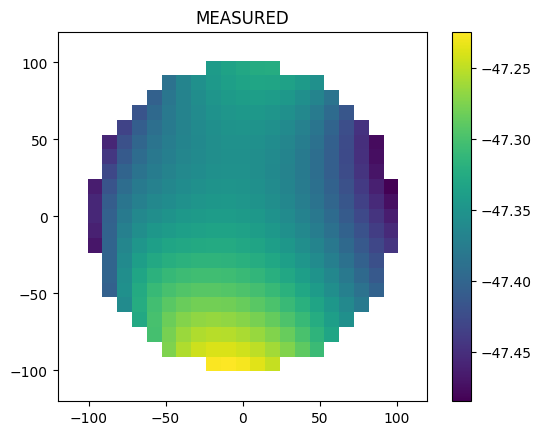

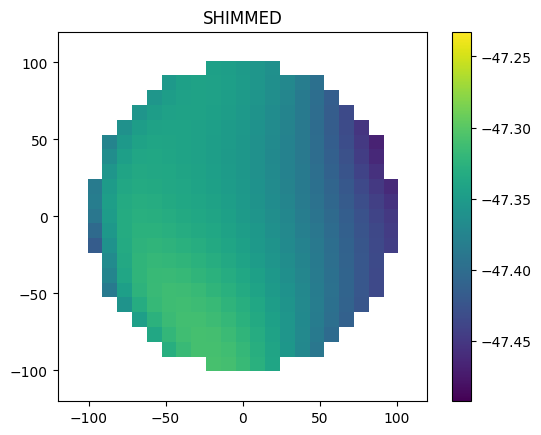

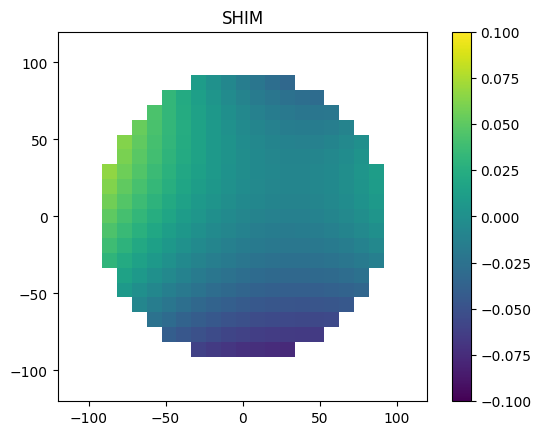

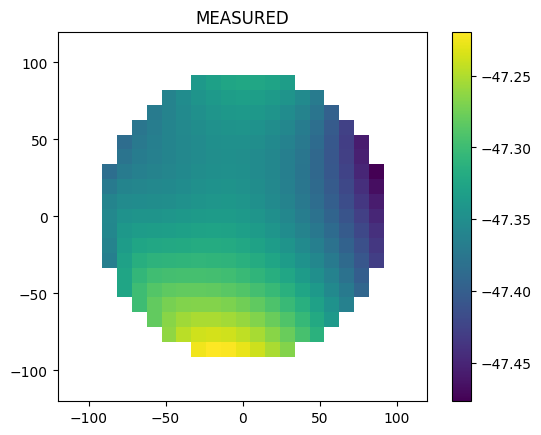

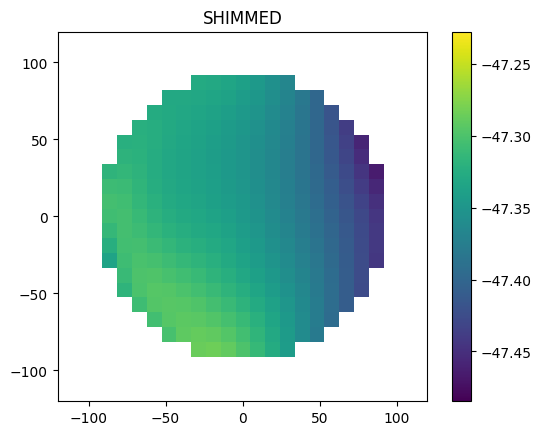

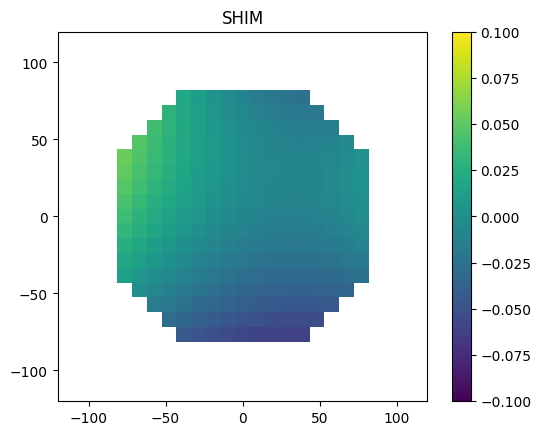

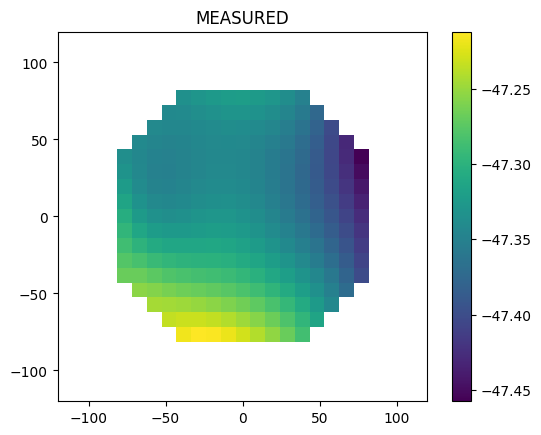

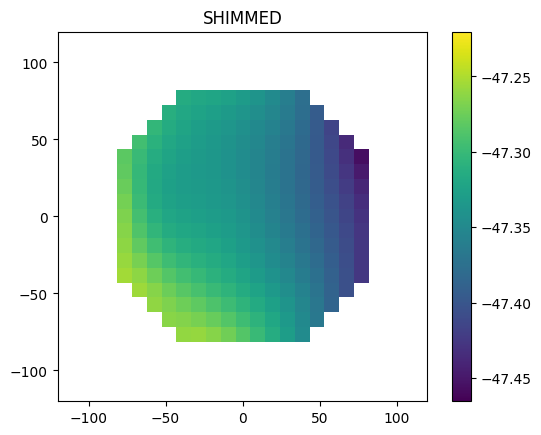

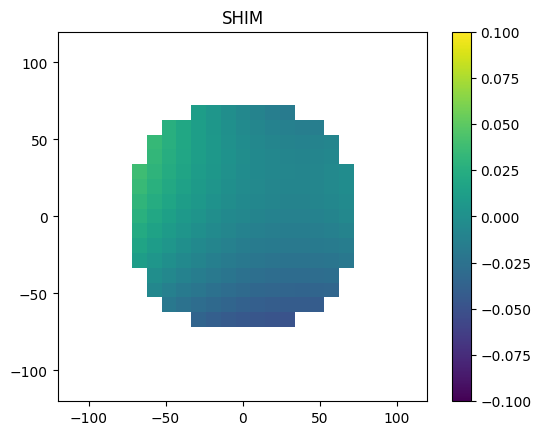

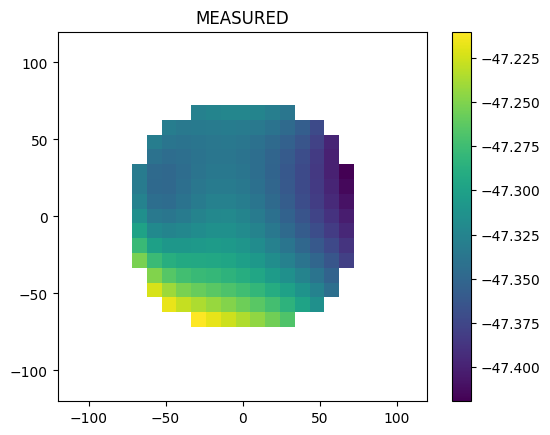

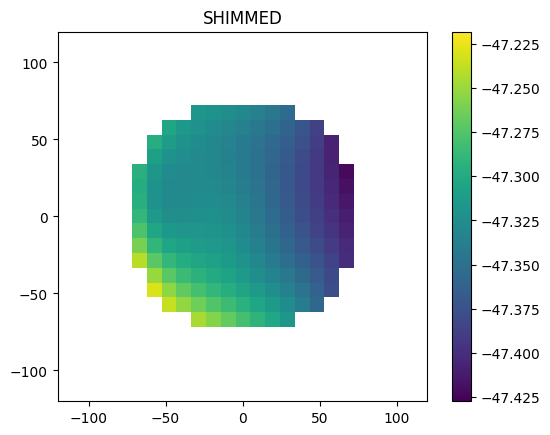

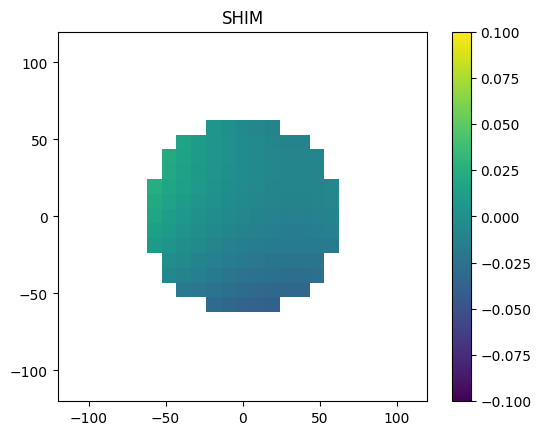

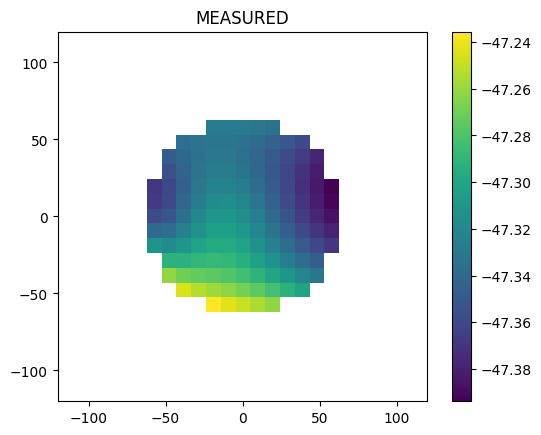

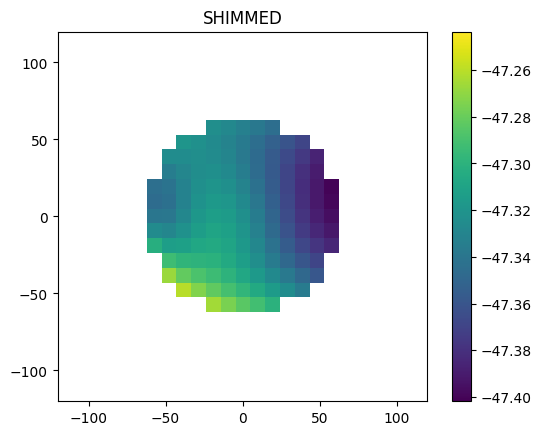

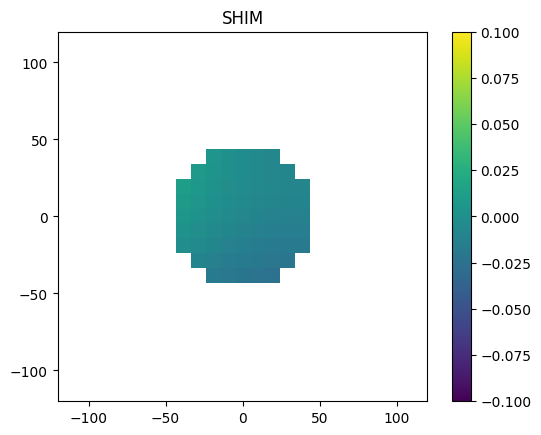

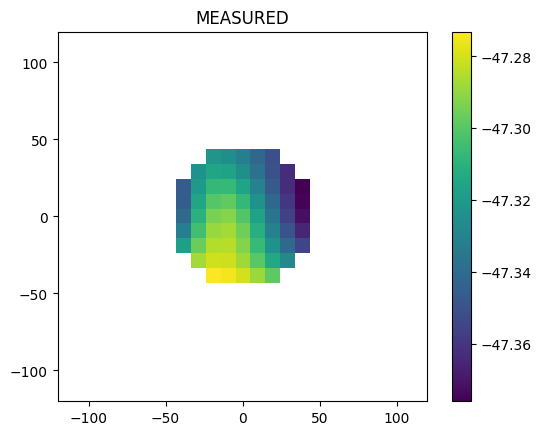

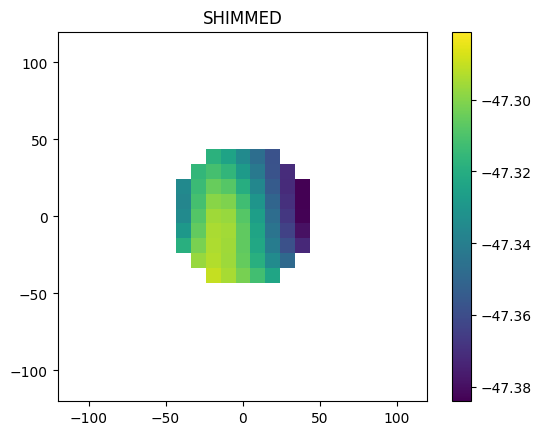

In [21]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#-np.pi/2#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('optIter2_1ring.npy')

optimized_shim_Field = np.matmul(magnetFields[...,1,:], -np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))
optimized_shim_Field*=b0map_shell_init.sphere_mask
FieldShimmed = FieldMeasured+optimized_shim_Field


shimoffset = np.nanmean(FieldShimmed)-np.nanmean(initialField)

for slicenr in range(24):
#slicenr = 17
    plt.imshow(optimized_shim_Field[slicenr,:,:],vmin=-1e-1,vmax=1e-1,origin='lower',extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('SHIM')
    plt.show()
    plt.imshow(FieldMeasured[slicenr,:,:],origin='lower',vmin=np.nanmin(FieldMeasured[slicenr,:,:]),vmax = np.nanmax(FieldMeasured[slicenr,:,:]),extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('MEASURED')
    plt.show()
    plt.imshow(FieldShimmed[slicenr,:,:],origin='lower',
            vmin=np.nanmin(initialField[slicenr,:,:]+shimoffset),
            vmax = np.nanmax(initialField[slicenr,:,:]+shimoffset),
            extent=[-120,120,-120,120])
    plt.colorbar()
    plt.title('SHIMMED')
    plt.show()



In [22]:
# now do the least squares optimization
#vector_of_magnet_rotations =np.load('optIter2_1ring.npy')#
vector_of_magnet_rotations = np.zeros(len(shimming_magnets))+3*np.pi/2#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 0,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


6438215.448099032
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         3.4222e+10                                    6.22e+09    
       1              2         1.7422e+10      1.68e+10       8.71e+00       1.97e+09    


C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `ftol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)
C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\least_squares.py:824: UserWarning: Setting `xtol` below the machine epsilon (2.22e-16) effectively disables the corresponding termination condition.
  ftol, xtol, gtol = check_tolerance(ftol, xtol, gtol, method)


       2              3         1.5547e+10      1.88e+09       9.34e+00       2.70e+09    
       3              4         1.3902e+10      1.64e+09       9.22e+00       1.36e+09    
       4              5         1.3494e+10      4.09e+08       8.13e+00       1.94e+09    
       5              6         1.1628e+10      1.87e+09       2.23e+00       9.86e+08    
       6              7         1.1214e+10      4.14e+08       3.88e+00       1.02e+09    
       7              8         1.0994e+10      2.20e+08       3.94e+00       8.98e+08    
       8              9         1.0525e+10      4.69e+08       1.05e+00       3.81e+08    
       9             10         1.0427e+10      9.80e+07       1.89e+00       3.76e+08    
      10             11         1.0324e+10      1.03e+08       4.82e-01       1.70e+08    
      11             12         1.0269e+10      5.49e+07       8.34e-01       1.53e+08    
      12             13         1.0245e+10      2.45e+07       8.58e-01       2.13e+08    

C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\common.py:154: RuntimeWarning: invalid value encountered in scalar divide
  ratio = phi / phi_prime
C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\common.py:398: RuntimeWarning: invalid value encountered in cast
  return min_step, np.equal(steps, min_step) * np.sign(s).astype(int)
C:\Users\kuliko02\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_lsq\trf.

      987           6400        1.0109e+10      0.00e+00       0.00e+00       6.25e+04    
The maximum number of function evaluations is exceeded.
Function evaluations 6400, initial cost 3.4222e+10, final cost 1.0109e+10, first-order optimality 6.25e+04.


In [31]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('optIter2_1ring.npy',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)
print(optimized_vector_of_magnet_rotations*180/np.pi)
print(np.mean(optimized_vector_of_magnet_rotations*180/np.pi))
#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = bRem
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0_expensive[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimized_shim_Field = np.matmul(magnetFields[...,1,:], -np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))


shimmed_Field_final = initialField+optimized_shim_Field

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimmed_Field_final))))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[3.47259689e+02 3.59083013e+02 3.60000000e+02 3.60000000e+02
 3.60000000e+02 3.60000000e+02 3.60000000e+02 1.12648723e+02
 1.29060020e+02 3.60000000e+02 1.66199760e+02 1.86649724e+02
 2.07326389e+02 2.27131861e+02 2.81440354e+02 2.94711469e+02
 3.07299826e+02 3.19595315e+02 3.32035313e+02 3.45172997e+02
 3.59022168e+02 8.03158300e+01 1.11629400e+02 1.36891436e+02
 1.55893720e+02 1.70778710e+02 1.83233234e+02 1.94255498e+02
 2.27041690e+02 2.36620898e+02 2.46418349e+02 2.56567511e+02
 2.67188484e+02 2.78372153e+02 2.90177592e+02 3.33689307e+02
 3.47235521e+02 3.59625491e+02 3.60000000e+02 3.60000000e+02
 3.60000000e+02 3.60000000e+02 3.60000000e+02 9.65058374e+01
 1.06814152e+02 1.17148178e+02 1.27573706e+02 1.38147547e+02
 1.48906820e+02 1.86427543e+02 1.97963408e+02 2.09553556e+02
 2.21125254e+02 2.32608080e+02 6.68336980e-39 2.55094360e+02
 2.91018962e+02 3.01407730e+02 3.11729959e+02 3.32560785e-36
 3.32449721e+02 3.43007395e+02 3.53817173e+02 3.60000000e+02
 3.60000000e+02 3.600000

<Figure size 640x480 with 0 Axes>

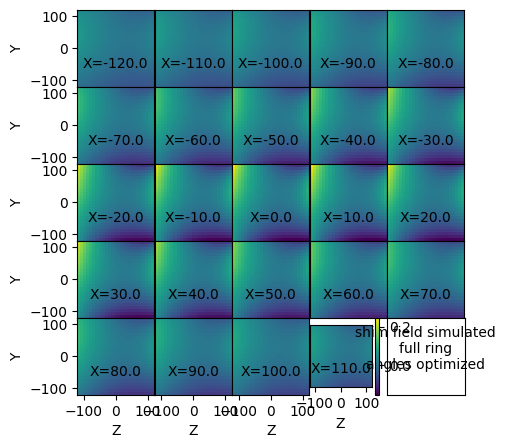

In [32]:
# SHIM FIELD
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

xvals = b0map_shell_init.xDim_SPH_fine


for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'shim field simulated\nfull ring\nangles optimized' , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(optimized_shim_Field[i*5+j,:,:],clim=[np.nanmin(optimized_shim_Field),np.nanmax(optimized_shim_Field)],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shim_field_ITER2_1RING.png',format="png")
plt.savefig('./pics/shim_field_ITER2_1RING.pdf',format="pdf")
plt.show()






shimmed simulated HOMO,ppm: 8689.161447278915


<Figure size 640x480 with 0 Axes>

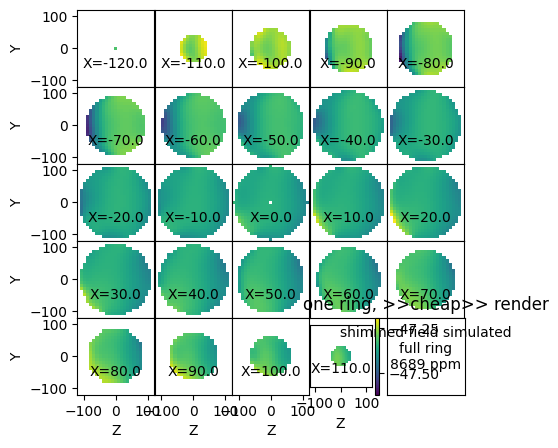

In [33]:
# SHIMMED field
plt.figure(0)

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(5, 5))

shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
print('shimmed simulated HOMO,ppm:',homoshimmed)


for i in range(5):
    for j in range(5):
        if i*5+j >=24:
            plt.colorbar(mappable=xxx)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
            axes[i,j].text(0.5, 0.6, 'shimmed field simulated\nfull ring\n%.0f ppm'%homoshimmed , horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
            break
        xxx = axes[i,j].imshow(shimmed_Field_final[i*5+j,:,:],clim=[np.nanmin(initialField)+shimoffset,np.nanmax(initialField)+shimoffset],origin = 'lower',extent=[-120,120,-120,120])
        axes[i,j].text(0.5, 0.3, 'X=%.1f'%xvals[i*5+j], horizontalalignment='center', verticalalignment='center', transform=axes[i,j].transAxes)
        axes[i,j].xaxis.set_visible(False)
        axes[i,j].yaxis.set_visible(False)
        if i==4:
            axes[i,j].xaxis.set_visible(True)
        if j==0:
            axes[i,j].yaxis.set_visible(True)
            
        axes[i,j].set_xlabel('Z')
        axes[i,j].set_ylabel('Y')
        plt.xlabel('Z')
        plt.ylabel('Y')
        
plt.title('one ring, >>cheap>> render')        
plt.subplots_adjust(wspace=-0.0, hspace=0)
plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
plt.show()






Y 0.27211479674710887 Z -0.04614691096140277 a 347.2596893213954
Y 0.2742709847847707 Z -0.030845208788272026 a 359.0830126281957
Y 0.27556740718070843 Z -0.015446815196073495 a 359.99999999961994
Y 0.276 Z 0.0 a 359.9999999999998
Y 0.27556740718070843 Z 0.0154468151960735 a 359.9999999999999
Y 0.2742709847847707 Z 0.030845208788272037 a 359.99999999999994
Y 0.27211479674710887 Z 0.04614691096140277 a 359.99999999999994
Y 0.2587317822093368 Z 0.09609300117480107 a 112.64872250234376
Y 0.2529482447387227 Z 0.11042275799670676 a 129.06002042797903
Y 0.2463717826715406 Z 0.12440636922299107 a 359.99999999995146
Y 0.2390230114445051 Z 0.13799999999999998 a 166.19976005977554
Y 0.2309249674754671 Z 0.15116103795771738 a 186.6497236245942
Y 0.22210303595045067 Z 0.16384822678806393 a 207.3263893872276
Y 0.21258487124793404 Z 0.17602179557230782 a 227.13186069202695
Y 0.17602179557230782 Z 0.21258487124793404 a 281.4403536887228
Y 0.16384822678806393 Z 0.22210303595045067 a 294.71146930765013

Text(0, 0.5, 'Z')

<Figure size 640x480 with 0 Axes>

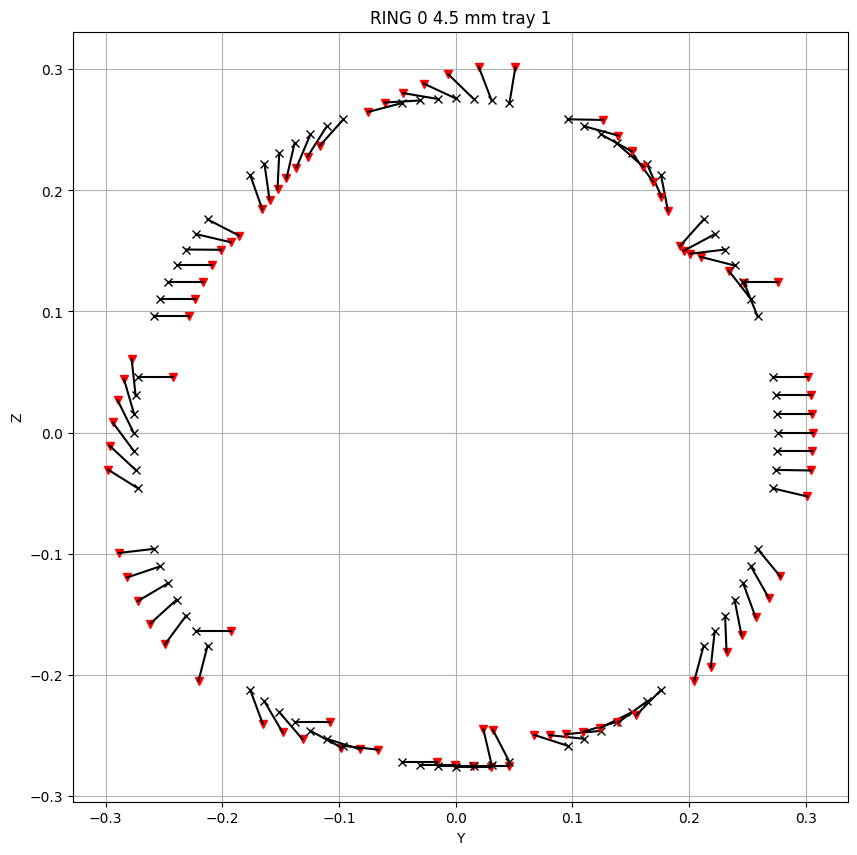

In [34]:
# MAGNET ROTATIONS RING 0
#plotting rotations

ring_number = 0

plt.figure(0)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

plt.title('RING %d %.1f mm tray %d'%(ring_number,1e3*ringPosition,trays_occupied[ring_number]))
rdisp = 3e-2 # length of displayed rotation vector 
for idx,tmppos in enumerate(positions):
    if tmppos[0] == ringPosition:
        angle = optimized_vector_of_magnet_rotations[idx]
        print('Y',tmppos[1],'Z',tmppos[2],'a',angle*180/np.pi)
        axes.plot(tmppos[1],tmppos[2],'xk')
        direction = [rdisp*np.cos(angle),rdisp*np.sin(angle)]
        axes.plot(tmppos[1]+direction[0],tmppos[2]+direction[1],'rv')
        axes.plot([tmppos[1],tmppos[1]+direction[0]],[tmppos[2],tmppos[2]+direction[1]],'k-')
        

plt.grid(1)
plt.xlabel('Y')
plt.ylabel('Z')



In [27]:
#?--- REALITY
#? --- REAL MAP RECORDED ---

In [28]:
# --- REALITY IS: --- 
# one ring with fixed euler rotations, sim promises 2500 ppm
# 1. import the b0 map


import numpy as np  
import b0
b0map_shell = b0.b0()
filename_to_import_csv_data_from = r'./data/240905/shell_ONE_RING_240905_50pts_bvals.csv'
b0map_shell.import_from_csv(filename_to_import_csv_data_from,eulers=[90,0,-90])


No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240905/shell_ONE_RING_240905_50pts_bvals.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240905/shell_ONE_RING_240905_50pts
 not used. path data taken from csv!
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
OOPS, |Bo|=0
importing path from a csv file


In [29]:
#calculate preliminary homogeneity
rawdata = b0map_shell.fieldDataAlongPath
filteredB0vals = np.zeros(len(rawdata))

for idx,val in enumerate(rawdata):
    B0 = val[0]
    if B0 == 0:
        val = rawdata[idx-1]
        B0=val[0]
    filteredB0vals[idx]=B0
    
print(max(filteredB0vals))
print(min(filteredB0vals))
meanval = np.nanmean(filteredB0vals)

for idx,val in enumerate(filteredB0vals):
    if abs(val/meanval)>2 or abs(val/meanval)<0.5 or val/meanval<0:
        filteredB0vals[idx] = filteredB0vals[idx-1]
        print(val)
        
maxval = max(filteredB0vals)
minval = min(filteredB0vals)
meanval = np.nanmean(filteredB0vals)

print(maxval)
print(minval)
print(meanval)

homoshell = (maxval-minval)/meanval*1e6

print('homo on shell:%.0f'%homoshell)



75.0
-47.491
47.301
47.458
75.0
7.271
47.432
1.98
47.283
-47.158
-47.491
-47.322974800000004
homo on shell:-7037


In [30]:
# spherical decomposition
diameter_of_sphere = b0map_test_ring_reality.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)

b0map_test_ring_reality.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map_test_ring_reality.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


NameError: name 'b0map_test_ring_reality' is not defined

In [ ]:
# REAL field (interpolated)
# save REAL field as 2d plots
from matplotlib import pyplot as plt
plt.figure(0)


xvals = b0map_test_ring_reality.xDim_SPH_fine
ShimmedFieldMeasured = b0map_test_ring_reality.interpolatedField
mapsize = int(np.sqrt(len(ShimmedFieldMeasured[:,0,0])))

shimoffset = np.nanmean(ShimmedFieldMeasured)-np.nanmean(FieldMeasured)

fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))


print(np.nanmean(ShimmedFieldMeasured))

print(np.nanmin(ShimmedFieldMeasured),np.nanmax(ShimmedFieldMeasured))

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(ShimmedFieldMeasured[i+j*mapsize,:,:],clim=[np.nanmin(FieldMeasured)+shimoffset,np.nanmax(FieldMeasured)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)

measuredHomo = abs((np.nanmax(ShimmedFieldMeasured)-np.nanmin(ShimmedFieldMeasured))/np.nanmean(ShimmedFieldMeasured)*1e6)
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED measured\n%.0f ppm'%measuredHomo)

plt.savefig('./pics/iter2_onering_real_field.png',format="png")
plt.savefig('./pics/iter2_onering_real_field.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

In [ ]:
# now lets get the measured field with the simulation using the rotations and varying the strength
# SHIMMED field
plt.figure(0)

mapsize = int(np.sqrt(len(FieldMeasured[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

#!!! TST !!!
shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    print(alpha)
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    magnet.bRem = NEW_B_REM*1
    pos = positions[idx]
    magnet.position = [pos[0],pos[1],pos[2]]
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimmed_Field_final = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


#!!!!!!!!!!!!

homoshimmed = abs((np.nanmax(shimmed_Field_final)-np.nanmin(shimmed_Field_final))/np.nanmean(shimmed_Field_final)*1e6)
shimoffset = np.nanmean(shimmed_Field_final) - np.nanmean(initialField)
print('shimmed simulated HOMO,ppm:',homoshimmed)

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(shimmed_Field_final[i+j*mapsize,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset],origin='lower')
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('SHIMMED var simulated\n%.0f ppm'%homoshimmed)

plt.savefig('./pics/shimmed_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/shimmed_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

 

In [ ]:
# difference between measured shimmed and intial
diff_measured_field = shimmed_Field_final-ShimmedFieldMeasured
plt.figure(0)

mapsize = int(np.sqrt(len(diff_measured_field[:,0,0])))
fig, axes = plt.subplots(nrows=mapsize, ncols=mapsize, figsize=(mapsize, mapsize))

xvals = b0map_iter1.xDim_SPH_fine



d = np.shape(coordinate_grid[0])
print(d[0])

g=3e-2

for i in range(mapsize):
    for j in range(mapsize):
        xxx = axes[j,i].imshow(diff_measured_field[i+j*mapsize,:,:],clim=[-g,g])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.title('VARSIM - REALMEAS')

plt.savefig('./pics/diff_field_ITER2_1ring.png',format="png")
plt.savefig('./pics/diff_field_ITER2_1ring.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

